# Ch6: Linear Model Selection and Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

%matplotlib inline


In [2]:
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected)

## Conceptual 
 

### **Q1.**


**(a)**

**Best Subset selection** would have the lowest training RSS for any given k, because it goes through the entire search space of $2^p$ possible models, while forward and backward stepwise perform a guided search through the search space potentially missing combinations of predictors with lower training RSS where the best model with $k$ predictors might not be a subset of the best model with $k+1$ predictors.

**(b)**

There's not enough information to answer this question as any of the models could have the lowest test RSS depending on the validation method and training and test sets.

**(c)**

i. True

ii. True

iii. False

iv. False

v. False

### **Q2.**

**(a)**

(iii) is the correct statement. The lasso is less flexible than least squares since it has an additional constraint namely the $\ell_1$ norm of the coefficients has to be less than a certain budget $s$, which results in an increase in bias that is offset by a decrease in variance.

**(b)** 

(iii) is the correct statement. Ridge regression is less flexible than least squares since it has an additional constraint namely the $\ell_2$ norm of the coefficients has to be less than a certain budget $s$, which results in an increase in bias that is offset by a decrease in variance.

**(c)** 

(ii) is the correct statement. Non-linear models are more flexible than least squares, which means they have lower bias and higher variance, Hence they give better predictions when the increase in variance is less than the decrease in bias.

### **Q3.**

**(a)** 

iv. Steadily decrease.

When $s = 0$ the constraint region would be a dot at the origin, meaning all coefficients are zero with a training RSS equivalent to the null model. As $s$ increases the size of the diamond constraint region increases including smaller values of RSS until eventually including the least squares estimates $\hat\beta$ which is the smallest RSS value it can get to.

![Figure 6.7](./images/figure6_7.png)

**(b)** 

ii. Decrease initially, and then eventually start increasing in a U shape.

As we increase the value of $s$ the flexibility of the model increases resulting in a decrease in bias and an increase in variance. For low values of $s$ the model would have a high bias and for high values of $s$ the model would have high variance, so its lowest test RSS would be at a point in the middle that minimizes the test RSS.

**(c)** 

iii. Steadily increase. 

As increasing the value of $s$ increases flexibility hence increasing variance.

**(d)** 

iv. Steadily decrease. 

As increasing the value of $s$ increases flexibility hence decreasing bias.

**(e)**

(v) Remains constant.

Because it's the error term that captures variability not included in our model (noise inherent in the data).

### **Q4.**


**(a)**

iii. Steadily increase.

At $\lambda = 0$ the coefficient estimates are equivalent to the least squares estimates, and as $\lambda$ increases the flexibility of the model decreases, resulting in a greater training RSS, until it becomes equivalent to the training RSS of the null model at $\lambda = \infty$.

**(b)**

ii. Decrease initially, then eventually start increasing in a U shape.

At small values of $\lambda$ where the flexibility is high, the model has high variance and low bias. As $\lambda$ increases the flexibility of the model decreases, reducing the variance and increasing the bias which results in a lower value of the test RSS. Eventually the flexibility gets too low and the model becomes too rigid to fit the data due to the high bias and low variance resulting in an increase in the test RSS.

**(c)**

iv. Steadily decrease.

As $\lambda$ increases the flexibility of the model decreases, resulting in a decrease in variance.

**(d)**


iii. Steadily increase.

As $\lambda$ increases the flexibility of the model decreases, resulting in an increase in bias.

**(e)**

(v) Remains constant.

Because it's the error term that captures variability not included in our model (noise inherent in the data).

### **Q5.**

$$
\begin{gathered}
n = 2 \\
p = 2 \\
x_{11} = x_{12} \\
x_{21} = x_{22} \\
y_{1} = - y_{2} \\
x_{11} = - x_{21} \\
x_{12} = - x_{22} \\
\hat\beta = 0
\end{gathered}
$$

**(a)** The ridge regression optimization problem takes the form:

Find the coefficients $\hat\beta^R$ that minimize the following quantity:

$$
\sum_{i = 1}^{n} (y_i - \hat\beta_0 - \sum_{j = 1}^{p} \hat\beta_j x_{ij} )^2 + \lambda \sum_{j = 1}^{p} \hat\beta_j^2
$$

Expanding the equation above:

$$
\min_{\hat\beta_1, \hat\beta_2}((y_1 - \hat\beta_0 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{12}))^2 + (y_2 - \hat\beta_0 - (\hat\beta_1 x_{21} + \hat\beta_2 x_{22}))^2 + \lambda (\hat\beta_1 ^2 + \hat\beta_2^2)) \\
$$

Substituting for $\hat\beta = 0,\quad x_{11} = x_{12},\quad x_{21} = x_{22},\quad x_{21} = - x_{11}$ and $y_2 = -y_1$:

$$
\min_{\hat\beta_1, \hat\beta_2}((y_1 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{11}))^2 + (y_1 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{11}))^2 + \lambda (\hat\beta_1 ^2 + \hat\beta_2^2))
$$

We finally get to:

$$
\min_{\hat\beta_1, \hat\beta_2}(2 (y_1 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{11}))^2 + \lambda (\hat\beta_1 ^2 + \hat\beta_2^2))
$$


**(b)** To minimize the equation above we'll set its derivatives with respect to $\hat\beta_0, \hat\beta_1$ to $0$:


\begin{align*}
\frac{d}{d\hat\beta_1} [2 (y_1 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{11}))^2 + \lambda (\hat\beta_1 ^2 + \hat\beta_2^2)] &= 0 \\
-4 x_{11} y_{1} + 4 \hat\beta_1 x_{11}^2 + 4 \hat\beta_2 x_{11}^2 - 2 \lambda \hat\beta_1 &= 0 \\
\hat\beta_1 = \frac{4 x_{11} y_{1} - 4 \hat\beta_2 x_{11}^2}{4 x_{11}^2 - 2 \lambda}
\end{align*}


\begin{align*}
\frac{d}{d\hat\beta_2} [2 (y_1 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{11}))^2 + \lambda (\hat\beta_1 ^2 + \hat\beta_2^2)] &= 0 \\
-4 x_{11} y_{1} + 4 \hat\beta_2 x_{11}^2 + 4 \hat\beta_1 x_{11}^2 - 2 \lambda \hat\beta_2 &= 0 \\
\hat\beta_2 = \frac{4 x_{11} y_{1} - 4 \hat\beta_1 x_{11}^2}{4 x_{11}^2 - 2 \lambda}
\end{align*}


By symmetry we can see that $\hat\beta_1 = \hat\beta_2$:

**(c)** The lasso regression optimization problem takes the form:

Find the coefficients $\hat\beta^L$ that minimize the following quantity:

$$
\sum_{i = 1}^{n} (y_i - \hat\beta_0 - \sum_{j = 1}^{p} \hat\beta_j x_{ij} )^2 + \lambda \sum_{j = 1}^{p} |\hat\beta_j|
$$

Expanding the equation above:

$$
\min_{\hat\beta_1, \hat\beta_2}((y_1 - \hat\beta_0 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{12}))^2 + (y_2 - \hat\beta_0 - (\hat\beta_1 x_{21} + \hat\beta_2 x_{22}))^2 + \lambda (|\hat\beta_1| + |\hat\beta_2|)) \\
$$

Substituting for $\hat\beta = 0,\quad x_{11} = x_{12},\quad x_{21} = x_{22},\quad x_{21} = - x_{11}$ and $y_2 = -y_1$:

$$
\min_{\hat\beta_1, \hat\beta_2}((y_1 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{11}))^2 + (y_1 - (\hat\beta_1 x_{11} + \hat\beta_2 x_{11}))^2 + \lambda (|\hat\beta_1| + |\hat\beta_2|))
$$

We finally get to:

$$
\min_{\hat\beta_1, \hat\beta_2}(2 (y_1 - x_{11} (\hat\beta_1 + \hat\beta_2 ))^2 + \lambda (|\hat\beta_1| + |\hat\beta_2|))
$$


**(d)** Starting with the equation we got from **(c)** and simplifying using $\hat\beta_1 + \hat\beta_2  = c$:

$$
2 (y_1 - x_{11} c)^2 + \lambda (|\hat\beta_1| + |\hat\beta_2|)
$$

For a fixed value of $c$, the minimal value of $|\hat\beta_1| + |\hat\beta_2|$ is $|c|$ which is achieved when $|\hat\beta_1|$ and $|\hat\beta_2|$ have the same sign so the problem reduces to:

$$
\min_{c}(2 (y_1 - x_{11} c)^2 + \lambda |c|)
$$

The optimal $c^*$ depends on $y_1, x_{11}, \lambda$ and we can see from above that there are infinitely many pairs ($\hat\beta_1, \hat\beta_2$) that satisfy $\hat\beta_1 + \hat\beta_2 = c^*$ given that $c^*\neq0$ which is why the solutions aren't unique in this setting.

This is a better answer to this question I found online. 

https://www.mathstat.dal.ca/~aarms2014/StatLearn/assignments/A3sol_2.pdf

### **Q6.**

**(a)** Starting with (6.12):

$$
(y_1 - \beta_1)^2 + \lambda \beta_1^2
$$

For $\lambda = 5$ and $y_1 = 24$ (chosen arbitrarly and greater than zero):

$$
(24 - \beta_1)^2 + 5 \beta_1^2
$$

4.004004004004004

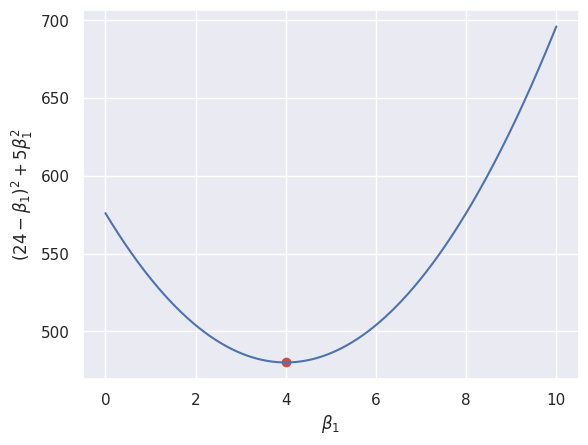

In [4]:
def f(y1, lamda, beta1):
    return (y1 - beta1)**2 + lamda * beta1**2

lamda = 5
y1 = 24
beta1 = np.linspace(0, 10, 1000)
y_hat =  f(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} \\beta_1^2$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r');
beta1[np.argmin(y_hat)]


Now using the formula $(6.14)$:

$$
\hat\beta_j^R = \frac{y_j}{1+\lambda}
$$

In [5]:
y1/(1+lamda)

4.0

We can see that the result from the equation above agrees with the plot and that $\hat\beta_1 = 4$ minimizes the equation.

**(b)** Starting with equation $(6.13)$:

$$
(y_1 - \beta_1)^2 + \lambda |\beta_1|
$$


To prove that the equation below (6.15) solves (6.13), we'll have to confirm that the plots agree on the minimum value picked from each case.

$$\hat{\beta}_j^L = 
\begin{cases}
y_j - \frac{\lambda}{2}, & \text{if } y_j > \frac{\lambda}{2},\\[6pt]
y_j + \frac{\lambda}{2}, & \text{if } y_j < -\frac{\lambda}{2},\\[6pt]
0, & \text{if } |y_j| \le \frac{\lambda}{2}.
\end{cases}
$$



For $\lambda = 5$ and $y_1 = 24$ (chosen arbitrarly to match case 1):

$$
(24 - \beta_1)^2 + 5 |\beta_1|
$$

In [6]:
lamda = 5
y1 = 24

y1 > lamda/2

True

21.471471471471475

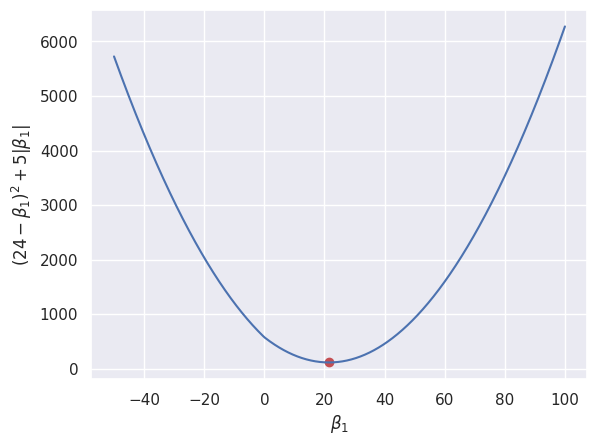

In [7]:
def f(y1, lamda, beta1):
    return (y1 - beta1)**2 + lamda * np.abs(beta1)

beta1 = np.linspace(-50, 100, 1000)
y_hat =  f(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} |\\beta_1|$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r');
beta1[np.argmin(y_hat)]

Using (6.15) and since $y_1 > \lambda/2$:

$$
\hat\beta_j^L = y_j - \lambda/2
$$

In [8]:
y1 - lamda/2

21.5

We can see that both results agree and that $\hat\beta_1 = 21.5$ minimizes the equation.

For case 2, we choose the values of $\lambda = 10$ and $y_1 = -40$:

In [9]:
lamda = 10
y1 = -40

y1 < -lamda/2

True

-34.994994994995

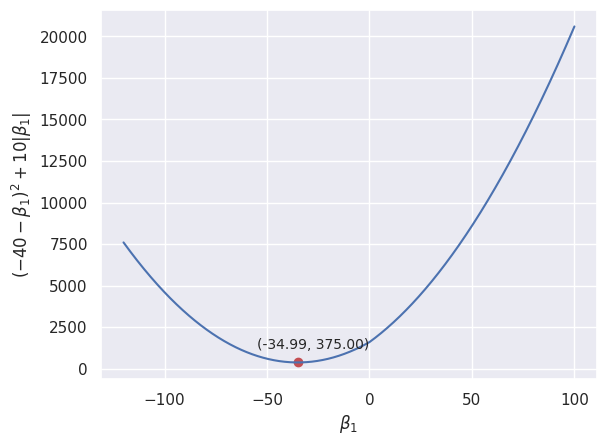

In [10]:
def f(y1, lamda, beta1):
    return (y1 - beta1)**2 + lamda * np.abs(beta1)

beta1 = np.linspace(-120, 100, 1000)
y_hat =  f(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} |\\beta_1|$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r')
plt.text(beta1[np.argmin(y_hat)]-20, 1200, f"({beta1[np.argmin(y_hat)]:.2f}, {np.min(y_hat):.2f})", fontdict={"fontsize":10});
beta1[np.argmin(y_hat)]

For case 2:

$$
\hat\beta_j^L = y_j + \lambda/2
$$

In [11]:
y1 + lamda/2

-35.0

We can see that it agrees with the plot and $\hat\beta_1^L = -35$ minimizes the equation.

For case 3 we choose $y_1 = 2$ and $\lambda = 4$:

In [12]:
y1 = 2
lamda = 4

np.abs(y1) <= lamda/2

True

0.020020020020020013

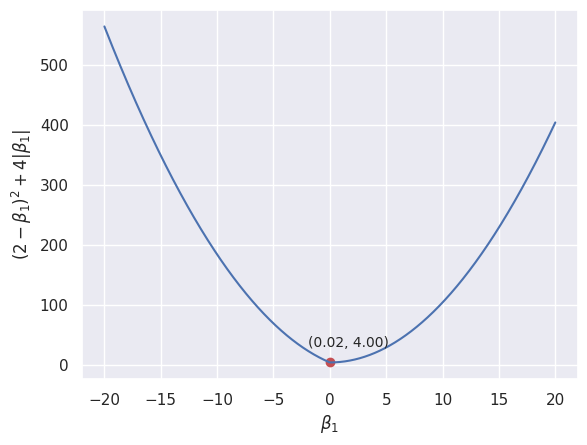

In [13]:
def f(y1, lamda, beta1):
    return (y1 - beta1)**2 + lamda * np.abs(beta1)

beta1 = np.linspace(-20, 20, 1000)
y_hat =  f(y1, lamda, beta1)

plt.plot(beta1, y_hat);
plt.xlabel('$\\beta_1$')
plt.ylabel(f'$({y1} - \\beta_1)^2 + {lamda} |\\beta_1|$')
plt.scatter(beta1[np.argmin(y_hat)], np.min(y_hat), color='r')
plt.text(beta1[np.argmin(y_hat)]-2, 30, f"({beta1[np.argmin(y_hat)]:.2f}, {np.min(y_hat):.2f})", fontdict={"fontsize":10});
beta1[np.argmin(y_hat)]

For case 3:

$$
\hat\beta_j^L = 0
$$

From the plot we can see that the minima of the plot is at $0$ which agrees with the coefficient picked by (6.15) case 3.

### **Q7.**

**(a)** We can see that $y_i$ is normally distributed with mean $\beta_0 + \sum_{j=1}^{p} x_{ij} \beta_{j}$ and variance $\sigma^2$:

$$
y_i \:|\: X,\: \beta \sim \; \mathcal{N} ( \beta_0 + \sum_{j=1}^{p} x_{ij} \beta_{j} + \epsilon_{i}, \: \sigma^2)
$$

Hence:

$$
f(y_i \:|\: X,\: \beta) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\left[\frac{-1}{2\sigma^2} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2\right]
$$

And since all $y_i$ are independant and identically distributed the likelihood would be the product of all their probability distributions.

\begin{align*}
f(Y \:|\: X,\: \beta) &= \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\left[-\frac{1}{2\sigma^2} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2\right] \\


f(Y \:|\: X,\: \beta) &= (\frac{1}{2\pi\sigma^2})^{n/2} \; \exp\left[ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 \right]
\end{align*}

**(b)** Since all $\beta_i$ are $i.i.d$ with a double-exponential distribution with mean $0$ and common scale parameter $b$ as their prior:

$$
p(\beta_{i}) = \frac{1}{2b} \exp\left(-|\beta_i|/b \right)
$$

Then:

\begin{align*}
p(\beta) &= \prod_{i=1}^{p} \frac{1}{2b} \exp\left(-|\beta_i|/b \right) \\
&= (\frac{1}{2b})^p \exp\left(-\sum_{i=1}^p |\beta_i| /b \right)
\end{align*}

The posterior is:

\begin{align*}
p(\beta | X, Y) &= f(Y | X, \beta) p(\beta) \\

&= (\frac{1}{2\pi\sigma^2})^{n/2} \; \exp\left[ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 \right] (\frac{1}{2b})^p \exp\left(- \sum_{j=1}^p \frac{|\beta_j|}{b}\right) \\

&= (\frac{1}{2b})^p (\frac{1}{2\pi\sigma^2})^{n/2} \; \exp\left[- \sum_{j=1}^p \frac{|\beta_j|}{b} -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 \right] 
\end{align*}


**(c)** First we'll find the mode $\hat\beta_{MAP}$ by maximizing probability density function above, we'll do that by taking its logarithm:

$$
\log p(\beta | X, Y) = -p \log(2b) - \frac{n}{2} \log(2\pi\sigma^2) - \sum_{j=1}^p \frac{|\beta_j|}{b} -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 
$$ 

To maximize the logarithm above we only need to consider terms that vary with $\beta$:

$$
\hat\beta_{MAP} = \underset{\beta}{\operatorname{argmax}} \left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 - \sum_{j=1}^p \frac{|\beta_j|}{b}\right)
$$


We can see that the terms are similar to the lasso problem, with a least squares sum on the left and an L1 penalty on the right. The difference here is that we're trying to maximize a negative quantity whereas in the lasso we try to minimize a positive quantity.

Since:

$$
\underset{x}{\operatorname{argmin}}(f(x)) = \underset{x}{\operatorname{argmax}}(-f(x))
$$

We can simply rewrite the problem as:

$$
\hat\beta_{MAP} = \underset{\beta}{\operatorname{argmin}}\left(\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 + \sum_{j=1}^p \frac{|\beta_j|}{b} \right)
$$

This is equivalent to the lasso estimate with $\lambda = \frac{2\sigma^2}{b}$:

$$
\hat\beta^L = \underset{\beta}{\operatorname{argmin}} \left( RSS + \lambda \|\beta\|_1 \right) \\ 
$$
Expanding the expression above:

$$
\hat\beta^L = \underset{\beta}{\operatorname{argmin}} \left(\sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 + \frac{2\sigma^2}{b} \sum_{j=1}^p |\beta_j|\right)
$$

$$
\hat\beta_{MAP} = \hat\beta^L
$$

**(d)** Since all $\beta_i$ are $i.i.d$ with a normal distribution with a mean $0$ and variance $c$:

$$
\beta_i \sim \mathcal{N}(0, c) \\

p(\beta_i) = \frac{1}{\sqrt{2\pi c}} \exp\left( -\frac{\beta_i^2}{2c} \right) \\ 
$$


Then:

\begin{align*}
p(\beta) &= \prod_{i=1}^p \frac{1}{\sqrt{2\pi c}} \exp\left( -\frac{\beta_i^2}{2c} \right)\\

&= (\frac{1}{2\pi c})^{p/2} \exp \left( -\sum_{i=1}^p \frac{\beta_i^2}{2c} \right)
\end{align*}

The posterior for $ \beta $ is:

\begin{align*}
p(\beta | X, Y) &= f(Y | X, \beta) p(\beta) \\

&= (\frac{1}{2\pi\sigma^2})^{n/2} \; \exp\left[ -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 \right] (\frac{1}{2\pi c})^{p/2} \exp\left( - \frac{1}{2c} \sum_{j=1}^p \beta_j^2  \right) \\

&=  (\frac{1}{2\pi c})^{p/2} (\frac{1}{2\pi\sigma^2})^{n/2} \; \exp\left[ - \frac{1}{2c} \sum_{j=1}^p \beta_j^2 -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 \right] 
\end{align*}

**(e)** We'll follow the same steps in **(C)** to find the mode $\hat\beta_{MAP}$: 

$$
\log p(\beta | X, Y) = -\frac{p}{2}\log(2\pi c) - \frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2c} \sum_{j=1}^p \beta_j^2 -\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 
$$

$$
\hat\beta_{MAP} = \underset{\beta}{\operatorname{argmax}} \left(-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 - \frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right)
$$


Since:

$$
\underset{x}{\operatorname{argmin}}(f(x)) = \underset{x}{\operatorname{argmax}}(-f(x))
$$

We can simply rewrite the problem as:

$$
\hat\beta_{MAP} = \underset{\beta}{\operatorname{argmin}} \left(\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 + \frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right)
$$


This is equivalent to the ridge regression estimate with $\lambda = \sigma^2/c$.

$$
\hat\beta^R = \underset{\beta}{\operatorname{argmin}} \left( RSS + \lambda \|\beta\|_2 \right) \\ 
$$


Expanding the expression above:

$$
\hat\beta^R = \underset{\beta}{\operatorname{argmin}} \left(\sum_{i=1}^{n} (y_i -\beta_0 - \sum_{j=1}^{p} x_{ij} \beta_{j})^2 + \frac{\sigma^2}{c} \sum_{j=1}^p \beta_j^2 \right)
$$

$$
\hat\beta_{MAP} = \hat\beta^R
$$

Since $p(\beta | X, Y)$ is a product of two multivariate normal distributions then it's also a multivariate normal distribution, which means its mode equals its mean resulting in:

$$
\hat\beta_{MAP} = \hat\beta_{mean} = \hat\beta^R
$$

## Applied

### **Q8.**

**(a)**

In [14]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
eps = rng.normal(size=100)

**(b)** We'll simply pick the constants to be:

$$
\begin{gathered}
\beta_0 = 50 \\
\beta_1 = 44 \\
\beta_2 = 97 \\
\beta_3 = 5
\end{gathered}
$$

Now we'll generate the response vector $Y$ according to the model:

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
$$



In [15]:
b0 = 50
b1 = 44
b2 = 97
b3 = 5

y = b0 + b1 * x + b2 * x**2 + b3 * x**3 + eps
y[:10]

array([ 76.34534441, 155.26730418,  75.18533933, 146.99222541,
       174.27288033,  89.79538712,  52.69118937, 107.79282114,
        80.92941577,  71.34962123])

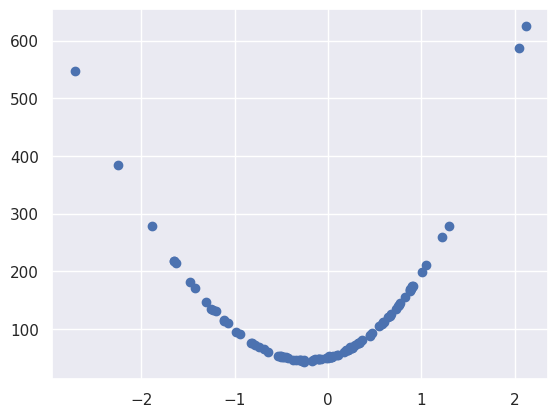

In [16]:
plt.scatter(x, y);

**(c)**

In [17]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 

First we'll estimate the variance $\sigma^2$ so we can use the $C_p$ metric, we'll do that by fitting a model with all the predictors $X, X^2, ..., X^{10}$.

In [18]:
df = pd.DataFrame({f'x^{i}':x**i for i in range(1, 11)})
df['y'] = y
df.head()

,x^1,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,y
0,0.345584,0.119428,0.041273,0.014263,0.004929,0.001703,0.000589,0.000203,0.000070,0.000024,76.345344
1,0.821618,0.675056,0.554639,0.455701,0.374412,0.307624,0.252749,0.207663,0.170620,0.140185,155.267304
2,0.330437,0.109189,0.036080,0.011922,0.003940,0.001302,0.000430,0.000142,0.000047,0.000016,75.185339
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236,4.897573,-6.382308,8.317150,-10.838554,14.124341,146.992225
4,0.905356,0.819669,0.742092,0.671858,0.608270,0.550701,0.498580,0.451393,0.408671,0.369993,174.272880


In [19]:
design = MS(df.columns.drop('y')).fit(df)
Y = np.array(df['y'])
# we drop the intercept here because the fitting process later adds an intercept
X = design.transform(df).drop('intercept', axis=1) 
sigma2 = OLS(Y,X).fit().scale
sigma2

814.8803706928072

In [20]:
neg_Cp = partial(nCp, sigma2)

Now we'll fit the model using forward stepwise selection.

In [21]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

model_forward = sklearn_selected(OLS,
                              strategy,
                              scoring=neg_Cp)

model_forward.fit(X, Y)
model_forward.selected_state_

('x^1', 'x^2', 'x^3')

In [22]:
model_forward.results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.597e+05
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          2.85e-194
Time:                        10:19:04   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.9428      0.120    416.437      0.000      49.705      50.181
x^1           44.1146      0.187    235.313      0.000      43.742      44.487
x^2           96.9529      0.099    979.102      0.000      96.756      97.149
x^3            4.9357      0.060     82.151      0.000       4.816       5.055
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.392
Skew:                           0.052   Prob(JB):                        0.822
Kurtosis:                       3.289   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model obtained according to $C_p$ is:

$$
Y = 49.94 + 44.11 X + 96.95 X^2 + 4.94 X^3  
$$


And the coefficients are:

\begin{align*}
\hat\beta_0 &= 49.94 \\
\hat\beta_1 &= 44.11 \\
\hat\beta_2 &= 96.95 \\
\hat\beta_3 &= 4.94 \\
\end{align*}

We can see that the estimated coefficients are pretty close to the ones in the true underlying model.

**(d)** Using backwards stepwise:

In [23]:
strategy = Stepwise.first_peak(design,
                               direction='backwards',
                               max_terms=len(design.terms))

model_backwards = sklearn_selected(OLS,
                              strategy,
                              scoring=neg_Cp)

model_backwards.fit(X, Y)
model_backwards.selected_state_

('x^1', 'x^2', 'x^3')

In [24]:
model_backwards.results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.597e+05
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          2.85e-194
Time:                        10:19:04   Log-Likelihood:                -140.47
No. Observations:                 100   AIC:                             288.9
Df Residuals:                      96   BIC:                             299.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     49.9428      0.120    416.437      0.000      49.705      50.181
x^1           44.1146      0.187    235.313      0.000      43.742      44.487
x^2           96.9529      0.099    979.102      0.000      96.756      97.149
x^3            4.9357      0.060     82.151      0.000       4.816       5.055
==============================================================================
Omnibus:                        0.845   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.392
Skew:                           0.052   Prob(JB):                        0.822
Kurtosis:                       3.289   Cond. No.                         5.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We got the same exact model obtained from **(c)**:

$$
Y = 49.94 + 44.11 X + 96.95 X^2 + 4.94 X^3  
$$

**(e)**

In [25]:
K = 5

outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)

inner_kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

scaler = StandardScaler()

lassoCV = skl.ElasticNetCV(l1_ratio=1,
                           cv=inner_kfold)

pipeCV = Pipeline([('scaler', scaler),
                ('lasso', lassoCV)])

results = skm.cross_validate(pipeCV, 
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')
-results['test_score']

array([0.95807935])

In [26]:
pipeCV.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
                              l1_ratio=1))])

In [27]:
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.coef_

array([ 3.73534163e+01,  1.14483615e+02,  1.43824335e+01,  0.00000000e+00,
        0.00000000e+00,  2.05614973e-01, -0.00000000e+00,  8.29412867e-02,
       -0.00000000e+00,  5.53145176e-02])

In [28]:
tuned_lasso.alpha_

0.09434150271628827

The optimal value of $\lambda$ that minimizes the CV error is $9.567\times10^{-9}$.

Now we'll plot the CV error against $-\log(\lambda)$. Most of this data is stored in the tuned lasso model.

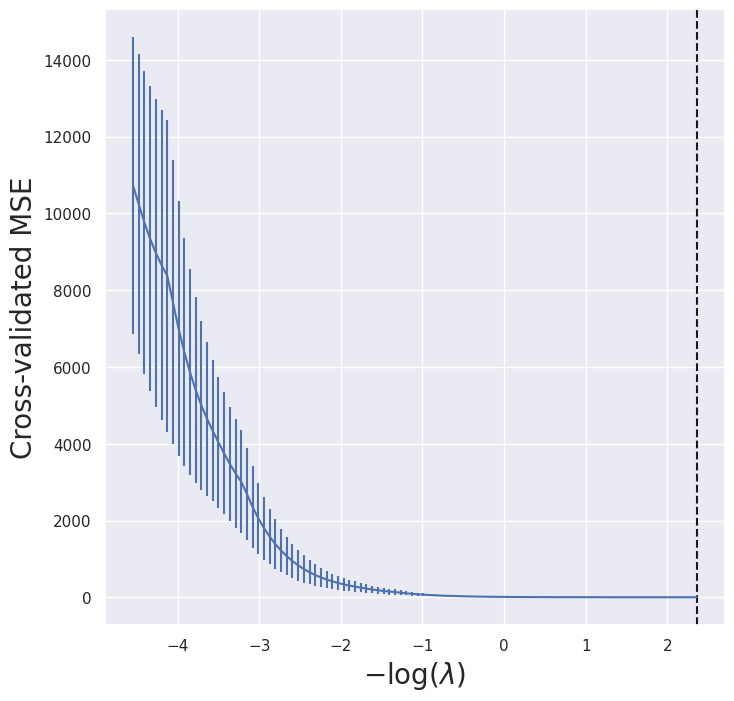

In [29]:
lassoCV_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

The CV MSE seems to stabilize for very small values of $\lambda$ (approaching zero). Looking at the graph one would wonder what results you get at $\lambda=0$ (OLS fit with all predictors) but that's not part of the question.

In [30]:
tuned_lasso.intercept_

115.50547867740701

In [31]:
tuned_lasso.coef_

array([ 3.73534163e+01,  1.14483615e+02,  1.43824335e+01,  0.00000000e+00,
        0.00000000e+00,  2.05614973e-01, -0.00000000e+00,  8.29412867e-02,
       -0.00000000e+00,  5.53145176e-02])

These are the values of the resulting coefficients:

$$
\hat\beta_{0} = 115.5 \quad \hat\beta_{1} = 37.35 \quad \hat\beta_{2} = 114.48  \quad \hat\beta_{3} = 14.38 \\
$$

$$
\hat\beta_{4} = 0.00 \quad \hat\beta_{5} = 0.00 \quad \hat\beta_{6} = 0.21 \quad \hat\beta_{7} = 0.00 \\ 
$$

$$
\hat\beta_{8} = 0.08 \quad \hat\beta_{9} = 0.00 \quad \hat\beta_{10} = 0.06
$$

We can rescale them to understand what they mean better.

In [32]:
scaler = pipeCV.named_steps['scaler']
tuned_lasso.coef_/ scaler.scale_

array([ 4.38648593e+01,  9.66391029e+01,  4.97622121e+00,  0.00000000e+00,
        0.00000000e+00,  4.78954023e-03, -0.00000000e+00,  2.76075239e-04,
       -0.00000000e+00,  2.55588074e-05])

And rescale the intercept seperately.

In [33]:
tuned_lasso.intercept_ - np.dot(tuned_lasso.coef_, scaler.mean_/scaler.scale_)

50.109058104632226

$$
\hat\beta_{0} = 50.1 \quad \hat\beta_{1} = 43.86 \quad \hat\beta_{2} = 96.64  \quad \hat\beta_{3} = 4.98 \\
$$
$$
\hat\beta_{4} = 0.00 \quad \hat\beta_{5} = 0.00 \quad \hat\beta_{6} = 0.0048 \quad \hat\beta_{7} = 0.00 \\ 
$$
$$
\hat\beta_{8} = 0.0003 \quad \hat\beta_{9} = 0.00 \quad \hat\beta_{10} = 0.00003
$$

Note that the estimated coefficients $\hat\beta_1, \hat\beta_2, \hat\beta_3$ are very close to the true underlying coefficients, while the other coefficients mistakenly included by the model have values close to $0$.

**(f)** 

In [34]:
b0 = 23
b7 = 50
y = b0 + b7 * x**7 + eps

In [35]:
df = pd.DataFrame({f'x^{i}':x**i for i in range(1, 11)})
df['y'] = y
df.head()

,x^1,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,y
0,0.345584,0.119428,0.041273,0.014263,0.004929,0.001703,0.000589,0.000203,0.000070,0.000024,22.378153
1,0.821618,0.675056,0.554639,0.455701,0.374412,0.307624,0.252749,0.207663,0.170620,0.140185,36.499915
2,0.330437,0.109189,0.036080,0.011922,0.003940,0.001302,0.000430,0.000142,0.000047,0.000016,22.895915
3,-1.303157,1.698219,-2.213046,2.883947,-3.758236,4.897573,-6.382308,8.317150,-10.838554,14.124341,-295.446225
4,0.905356,0.819669,0.742092,0.671858,0.608270,0.550701,0.498580,0.451393,0.408671,0.369993,49.147866


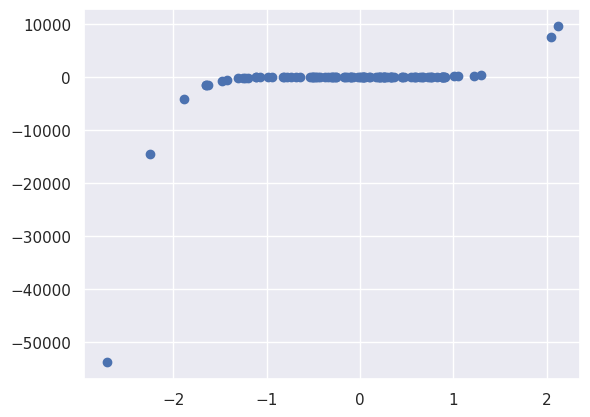

In [36]:
plt.scatter(x, y);

In [37]:
design = MS(df.columns.drop('y')).fit(df)
Y = np.array(df['y'])
X = design.transform(df).drop('intercept', axis=1)
sigma2 = OLS(Y,X).fit().scale
sigma2

173.27265731949643

In [38]:
neg_Cp = partial(nCp, sigma2)
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))

model_forward = sklearn_selected(OLS,
                              strategy,
                              scoring=neg_Cp)

model_forward.fit(X, Y)
model_forward.selected_state_

('x^7',)

In [39]:
model_forward.results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.364e+09
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:19:05   Log-Likelihood:                -139.12
No. Observations:                 100   AIC:                             282.2
Df Residuals:                      98   BIC:                             287.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     22.9048      0.099    231.740      0.000      22.709      23.101
x^7           49.9983      0.001    5.8e+04      0.000      49.997      50.000
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.479
Skew:                          -0.035   Prob(JB):                        0.787
Kurtosis:                       3.332   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Forward stepwise selection was able to correctly identify the significance of the intercept and $X^7$ and made very good estimates for them.

$$
\hat\beta_0 = 22.9 \\
$$

$$
\hat\beta_7 = 50
$$

Fitting the lasso model:

In [40]:
scaler = StandardScaler()

K = 5

kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

lassoCV = skl.ElasticNetCV(l1_ratio=1,
                           cv=kfold)

pipeCV = Pipeline([('scaler', scaler),
                ('lasso', lassoCV)])
pipeCV.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
                              l1_ratio=1))])

In [41]:
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.coef_

array([ -23.83668   ,    0.        ,    0.        ,   -0.        ,
        884.14226819,   -0.        , 3554.24953   ,   -0.        ,
       1292.65572729,   -0.        ])

We can see that the lasso selected the predictors $X, X^5, X^7, X^9$ with the coefficients $-23.84, 884.14, 3554.25, 1292.66$ respectively.

We can also rescale them using the following code to understand them better.

In [42]:
scaler = pipeCV.named_steps['scaler']
tuned_lasso.coef_/ scaler.scale_

array([-27.99188718,   0.        ,   0.        ,  -0.        ,
        52.25920473,  -0.        ,  31.18606038,  -0.        ,
         1.5992205 ,  -0.        ])

In [43]:
tuned_lasso.intercept_ - np.dot(tuned_lasso.coef_, scaler.mean_ / scaler.scale_) 

29.426020977326743

$$
\hat\beta_{0} = 29.43  \quad \hat\beta_{1} = -28 \quad \hat\beta_{5} = 52.26 \\
$$

$$
\hat\beta_{7} = 31.19 \quad \hat\beta_{9} = 1.6
$$

We can see that the lasso ended up with a pretty weird model containing various predictors not originally in the true underlying model.

Forward stepwise did a lot better than the lasso here.

### **Q9.**

In [44]:
college = load_data('College')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [45]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    category
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null    int64   
dtypes: category(1), float64(1), in

In [46]:
college.describe(include='all')

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


**(a)**

In [47]:
design = MS(college.columns.drop('Apps'))

X = design.fit_transform(college)
y = college['Apps']

X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.3, random_state=1)

**(b)**

In [48]:
results = OLS(y_train, X_train).fit()
pred = results.predict(X_test)
ols_MSE = np.mean((pred - y_test)**2)
ols_MSE

642753.8976528522

We got a test MSE of $642753.90$.

**(c)**

In [49]:
X[:5]

,intercept,Private[Yes],Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.0,1.0,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1.0,1.0,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1.0,1.0,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1.0,1.0,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1.0,1.0,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


We have to drop the intercept when fitting `RidgeCV` and `LassoCV` since they add an intercept by default.

In [50]:
X_train = X_train.drop('intercept', axis=1)
X_test = X_test.drop('intercept', axis=1)

In [51]:
K = 5 
lambdas = np.linspace(0, 50, 100) 

inner_kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

scaler = StandardScaler()

ridgeCV = skl.RidgeCV(alphas=lambdas,
                      cv=inner_kfold)

pipeCV = Pipeline([('scaler', scaler),
                ('ridge', ridgeCV)])

pipeCV.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62...
       35.35353535, 35.85858586, 36.36363636, 36.86868687, 37.37373737,
       37.87878788, 38.38383838, 38.88888889, 39.39393939, 39.8989899 ,
       40.4040404 , 40.90909091, 41.41414141, 41.91919192, 42.42424242,
       42.92929293, 43.43434343, 43.93939394, 44.44444444, 44.94949495,
       45.45454545, 45.95959596, 46.46464646, 46.96969697, 47.47474747,
       47.97979798, 48.48484848, 48.98989899, 49.49494949, 50.        ]),
                         cv=KFold(n_splits=5, random_state=2, shuffle=True)))])

In [52]:
pipeCV.named_steps['ridge'].alpha_

8.080808080808081

In [53]:
pred = pipeCV.predict(X_test)
ridge_MSE = np.mean((pred - y_test)**2)
ridge_MSE

668492.5378936714

In [54]:
pipeCV.named_steps['ridge'].intercept_

3090.7329650092083

In [55]:
pipeCV.named_steps['ridge'].coef_

array([-1.63231511e+02,  3.52552333e+03, -2.50526186e+02,  8.51856420e+02,
       -2.44289738e+02,  1.91467139e+02,  3.96478531e+01, -3.03344785e+02,
        2.02248350e+02, -1.17161850e+01, -2.21112834e-01, -1.39384427e+02,
       -4.20845395e+01,  6.40900697e+01, -2.73971161e+01,  4.45765894e+02,
        1.69484877e+02])

The test MSE obtained for the ridge regression is $668492.54$.

**(d)**

In [56]:
K = 5 

inner_kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

scaler = StandardScaler()

lassoCV = skl.ElasticNetCV(l1_ratio=1,
                           cv=inner_kfold)

pipeCV = Pipeline([('scaler', scaler),
                ('lasso', lassoCV)])

pipeCV.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
                              l1_ratio=1))])

In [57]:
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

35.25263542775875

In [58]:
pred = pipeCV.predict(X_test)
lasso_MSE = np.mean((pred - y_test)**2)
lasso_MSE

711843.8332488546

The test MSE obtained for the lasso model is $711843.83$.

In [59]:
tuned_lasso.intercept_

3090.7329650092083

In [60]:
tuned_lasso.coef_

array([-9.79298525e+01,  3.54463084e+03, -0.00000000e+00,  5.57558717e+02,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.03090809e+02,
        1.27406960e+02,  0.00000000e+00,  0.00000000e+00, -8.17549143e+01,
       -2.30633926e+01,  0.00000000e+00, -2.47229901e+00,  3.76424922e+02,
        6.88473000e+01])

In [61]:
sum(tuned_lasso.coef_ != 0)

10

11 out of 18 coefficients had non-zero estimates including the intercept.

**(e)** 

In [62]:
scaler = StandardScaler()
pca = PCA()
linreg = skl.LinearRegression()

pipe = Pipeline([('scaler', scaler),
                 ('pca', pca),
                 ('linreg', linreg)])

param_grid = {'pca__n_components': range(1, 18)}

K = 5

kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

In [63]:
grid.best_params_

{'pca__n_components': 17}

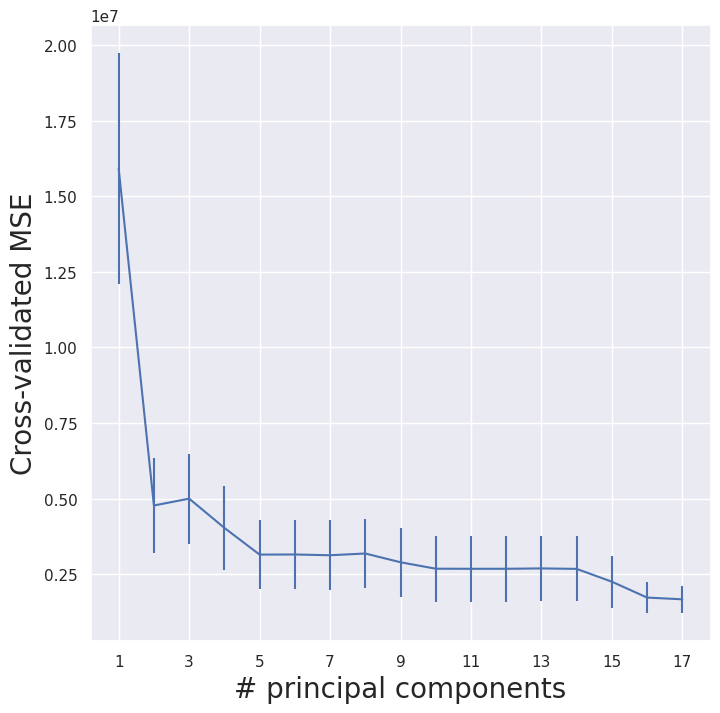

In [64]:
pcr_fig, ax = plt.subplots(figsize=(8,8))
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2]);

The number of components $M$ that minimizes the MSE is `17`.

In [65]:
pipe.named_steps['pca'].n_components = grid.best_params_['pca__n_components']
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=17)),
                ('linreg', LinearRegression())])

In [66]:
pred = pipe.predict(X_test)
pcr_MSE = np.mean((pred - y_test)**2)
pcr_MSE

642753.8976533808

This resulted in a test MSE of $642753.90$ which is the same as fitting a linear regression with all predictors.

That's not surpising since fitting PCR with all p predictors is equivalent to an OLS estimate.

**(f)**

In [67]:
pls = PLSRegression(scale=True)

param_grid = {'n_components':range(1, 18)}
grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 18)},
             scoring='neg_mean_squared_error')

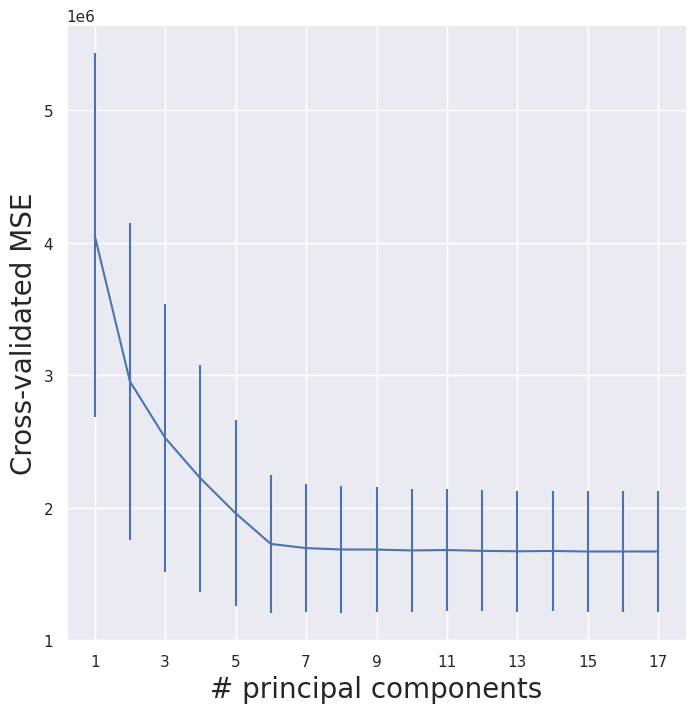

In [68]:
pls_fig, ax = plt.subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2]);

In [69]:
grid.best_params_

{'n_components': 16}

In [70]:
pls.n_components = 16
pls.fit(X_train, y_train)

PLSRegression(n_components=16)

In [71]:
pred = pls.predict(X_test)
pls_MSE = np.mean((pred - y_test)**2)
pls_MSE

642728.9614907254

Cross-validation chose the value of $M = 16$, which resulted in a test MSE of $642728.96$. Slightly lower than the test MSE for PCR and OLS, and the lowest of all models we trained so far.

**(g)**

Comparing the RMSE for the models side to side we can see that PLS comes in first place followed by OLS and PCR (tied for 2nd) with a very small difference in test RMSE, Ridge in 4th place and finally Lasso in last place with a considerably higher test RMSE.

In [72]:
approaches = ['OLS', 'Ridge', 'Lasso', 'PCR', 'PLS']
mse_values = [ols_MSE, ridge_MSE, lasso_MSE, pcr_MSE, pls_MSE]

rmse_values = np.sqrt(mse_values)
for approach, rmse_value in zip(approaches, rmse_values):
    print(f"{approach}: {rmse_value:.2f}")

OLS: 801.72
Ridge: 817.61
Lasso: 843.71
PCR: 801.72
PLS: 801.70


Plotting the results side by side.

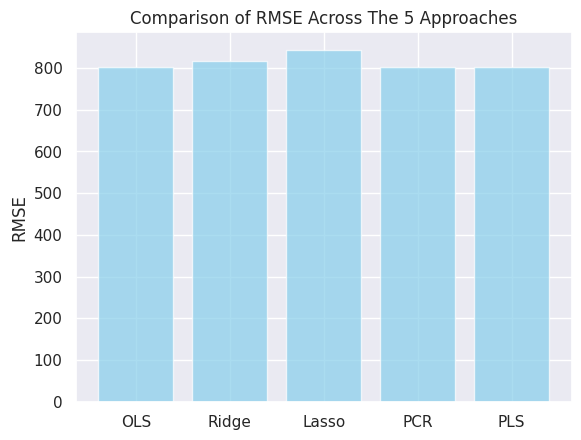

In [73]:
plt.bar(approaches, rmse_values, color="skyblue", alpha=0.7)
plt.ylabel("RMSE")
plt.title("Comparison of RMSE Across The 5 Approaches")
plt.show()

We can see that using our best model (PLS with RMSE = 801.7), our predictions, on average, deviate from the actual number of applications by about 801.7.

In [74]:
801.7/college['Apps'].mean()

0.26708747217842854

That error is roughly $27\%$ of the mean value.

How good of a prediction that is depends on the context and application we plan to use this model for.

### **Q10.** 

**(a)** We'll generate $n=1000$ observations with $p=20$ predictors from a multivariate normal distribution with an AR(1) correlation matrix with $\rho =0.8$.

Note: In my first attempt `best_subset_selection` minimized test MSE for a model of 20 predictors, which is not
allowed by the question so I increased the noise level and set more coefficients to 0, that still didn't work so I used a multivariate normal distribution instead of a standard normal to generate the predictors.

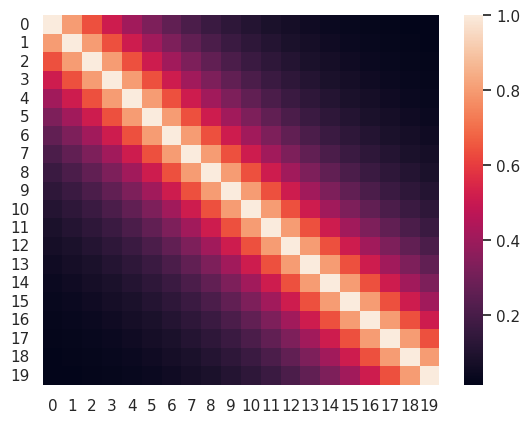

In [75]:
n = 1000
p = 20

def correlation_ar1(p, rho=0.5):
    """
    Returns an AR(1) correlation matrix of dimension p x p 
    with correlation parameter rho.
    AR(1) means Corr(X_i, X_j) = rho^|i - j|.
    """
    Sigma = np.zeros((p, p))
    for i in range(p):
        for j in range(p):
            Sigma[i, j] = rho ** abs(i - j)
    return Sigma

Sigma = correlation_ar1(p, rho=0.8)
sns.heatmap(Sigma);

If you're curious about the AR(1) correlation matrix that's what it looks like, it basically means that close variables are more positively correlated with eachother.

In [76]:
rng = np.random.default_rng(2025)
X = rng.multivariate_normal(mean=np.zeros(p), cov=correlation_ar1(p, rho=0.8), size=n)

eps = rng.normal(0, 7, size=(n, ))
X.shape

(1000, 20)

Then we'll create a coefficient vector $\beta$ and generate a response vector $Y$ according to the model:

$$
Y = X \beta + \epsilon
$$

In [77]:
B = np.array([2, 0, 0, 1, -2,
              -1, 0, 2, 0, 0, 
              0, 0, 0, 0, 0,
              0, 3, 0, 4, 0])

y = np.dot(X, B) + eps
y.shape

(1000,)

In [78]:
y[:5]

array([ -4.258917  ,  -7.98801827,  10.0552184 , -14.99753185,
        -0.95005508])

**(b)** 

In [79]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=900, random_state=1)

In [80]:
X_train.shape, y_test.shape

((100, 20), (900,))

**(c)**

In [81]:
from itertools import combinations

def best_subset_selection(X_train, X_test, y_train, y_test):
    
    p = X_train.shape[1]
    best_model_for_k = {}
    
    for k in range(p+1):
        
        # fit the null model
        if k == 0:
            linreg = skl.LinearRegression().fit(np.zeros_like(X_train), y_train)
            train_MSE = np.mean((linreg.predict(X_train) - y_train)**2)

            pred = linreg.predict(X_test)
            test_MSE = np.mean((pred - y_test)**2)
            best_model_for_k[k] = ((), linreg, train_MSE, test_MSE)
            continue
        
        smallest_MSE = np.inf
        
        # fit all p choose k combinations and pick the model with the smallest test_MSE
        for subset in combinations(range(p), k):
            
            linreg = skl.LinearRegression().fit(X_train[:,subset], y_train)
            train_MSE = np.mean((linreg.predict(X_train[:,subset]) - y_train)**2)
            
            pred = linreg.predict(X_test[:,subset])
            test_MSE = np.mean((pred - y_test)**2)
            
            if test_MSE < smallest_MSE:
                best_model_for_k[k] = (subset, linreg, train_MSE, test_MSE)
            
    return best_model_for_k

Note: This takes a few minutes to run.

In [82]:
best_model_for_k = best_subset_selection(X_train, X_test, y_train, y_test)

**(c)**

In [83]:
model_sizes = list(best_model_for_k.keys())
subsets = [value[0] for value in best_model_for_k.values()]
models = [value[1] for value in best_model_for_k.values()]
train_MSEs = [value[2] for value in best_model_for_k.values()]
test_MSEs = [value[3] for value in best_model_for_k.values()]

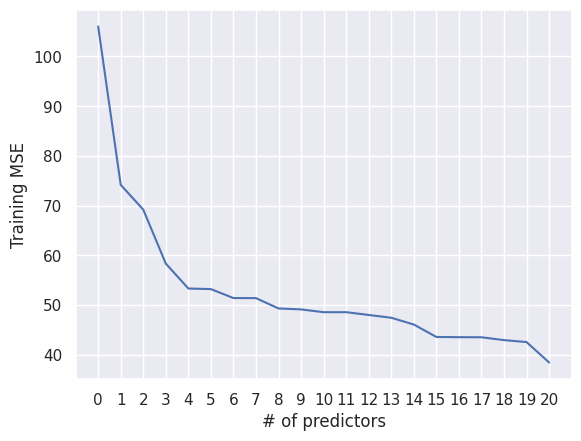

In [84]:
fig, ax = plt.subplots()
ax.plot(model_sizes, train_MSEs)
ax.set_xlabel('# of predictors')
ax.set_ylabel('Training MSE')
ax.set_xticks(model_sizes);


**(d)**

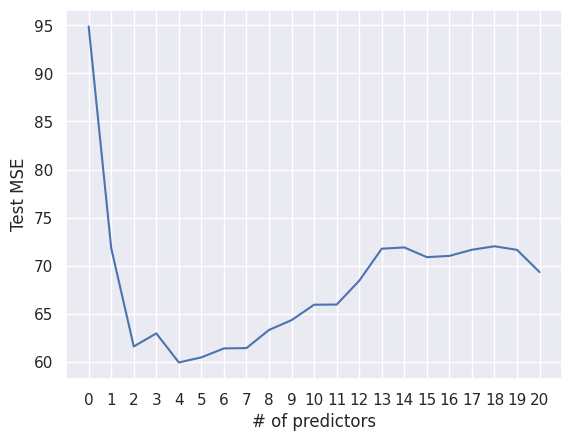

In [85]:
fig, ax = plt.subplots()
ax.plot(model_sizes, test_MSEs)
ax.set_xlabel('# of predictors')
ax.set_ylabel('Test MSE')
ax.set_xticks(model_sizes);


In [86]:
min_p = np.argmin(test_MSEs)
min_p

4

In [87]:
subsets[min_p], test_MSEs[min_p]

((16, 17, 18, 19), 59.94656567078981)

**(e)** The test set MSE takes on its minimum value for a model of size 4.

**(f)** Looking at the true model coefficients and the ones returned by the best subset selection:

In [88]:
for coef, beta in zip(models[min_p].coef_, B[list(subsets[min_p])]):
    print(f"|{coef:.2f} - {beta}| = {np.abs(coef - beta):.2f}")

|3.87 - 3| = 0.87
|2.69 - 0| = 2.69
|-0.41 - 4| = 4.41
|2.13 - 0| = 2.13


Apart from the first coefficient, they're not exaclty close to their true values, but these predictors seem to capture the correlations in the data the best.

**(g)** Now we'll create a plot displaying the size of the models $r$ on the x-axis and the euclidean distance between the true and estimated coefficient vectors (the quantity below).

$$
\sqrt{\sum_{j=1}^{p} (\beta_j - \hat\beta_j^r)^2}
$$

In [89]:
# rename this properly later
euclidean_distance = {}
for r in range(1, p+1):
    subset = list(subsets[r])
    B_r = np.zeros(20)
    for i, coef in zip(subsets[r], models[r].coef_):
        B_r[i] = coef

    euclidean_distance[r] = np.sqrt(np.sum((B - B_r)**2))

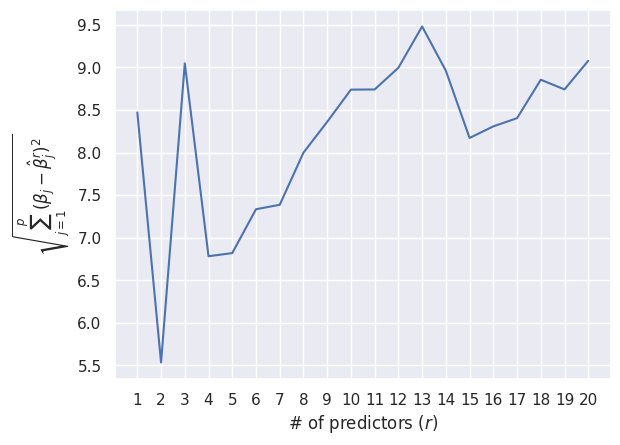

In [90]:
fig, ax = plt.subplots()
ax.plot(euclidean_distance.keys(), euclidean_distance.values())
ax.set_xlabel("# of predictors ($r$)")
ax.set_ylabel("$\\sqrt{\\sum_{j=1}^{p} (\\beta_j - \\hat\\beta_j^r)^2}$")
ax.set_xticks(list(euclidean_distance.keys()));

In [91]:
subsets[2], models[2].coef_ , B[list(subsets[2])]

((18, 19), array([3.87389325, 2.75898638]), array([4, 0]))

We can see that the plot slightly resembles the characteristic U-shape we often see for test MSE, though this one has a slight kink at $r = 2$ where the euclidean distance is minimized, ignoring that however our best model at $r = 4$ is a local minimum and has the 2nd lowest euclidean distance overall.

While not an indicator of model performance, euclidean distance between true and model coefficients seems like a useful guide to follow to possibly reduce the search space of subset selection methods (that is if we already have a good reference model).

### **Q11.**

**(a)**

In [92]:
boston = load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [93]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [94]:
boston.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


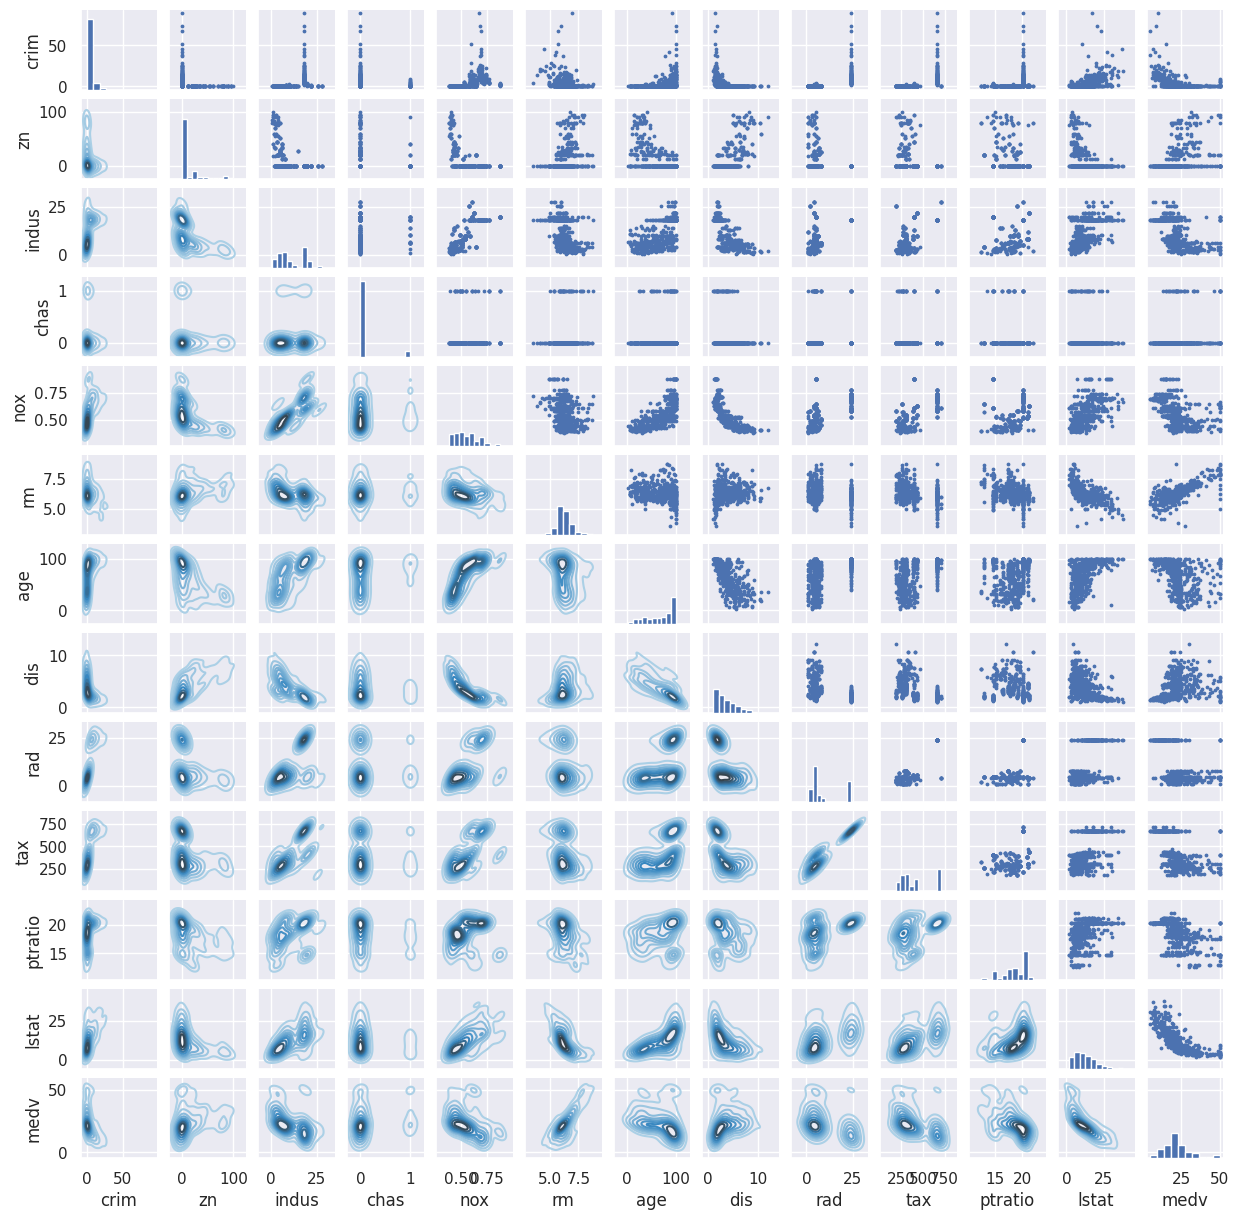

In [95]:
g = sns.PairGrid(boston)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.figure.set_size_inches(12, 12)

In [96]:
design = MS(boston.columns.drop('crim'), intercept=False)

X = design.fit_transform(boston)
y = boston['crim']

In [97]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.3, random_state=1)

**(a)**

In [98]:
linreg = skl.LinearRegression().fit(X_train, y_train)
pred = linreg.predict(X_test)
ols_MSE = np.mean((pred - y_test)**2)
ols_MSE

50.510476246307825

#### Lasso

In [99]:
K = 5 

kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

scaler = StandardScaler()

lassoCV = skl.ElasticNetCV(l1_ratio=1,
                           cv=kfold)

pipeCV = Pipeline([('scaler', scaler),
                ('lasso', lassoCV)])

pipeCV.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
                              l1_ratio=1))])

In [100]:
pred = pipeCV.predict(X_test)
lasso_MSE = np.mean((pred - y_test)**2)
lasso_MSE

50.05144200256413

In [101]:
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.coef_

array([ 1.11555504, -0.45970059, -0.25950381, -1.13852783, -0.08281087,
       -0.        , -1.90997326,  4.91056988, -0.        , -0.54943198,
        1.36320495, -1.34364266])

In [102]:
np.sum(tuned_lasso.coef_ != 0)

10

#### Ridge

In [103]:
K = 5 
lambdas = np.linspace(0, 100, 1000) 

kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

scaler = StandardScaler()

ridgeCV = skl.RidgeCV(alphas=lambdas,
                      cv=kfold)

pipeCV = Pipeline([('scaler', scaler),
                ('ridge', ridgeCV)])

pipeCV.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
         0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
         1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
         1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
         2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
         2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
         2.80...
        97.2972973 ,  97.3973974 ,  97.4974975 ,  97.5975976 ,
        97.6976977 ,  97.7977978 ,  97.8978979 ,  97.997998  ,
        98.0980981 ,  98.1981982 ,  98.2982983 ,  98.3983984 ,
        98.4984985 ,  98.5985986 ,  98.6986987 ,  98.7987988 ,
        98.8988989 ,  98.998999  ,  99.0990991 ,  99.1991992 ,
        99.2992993 ,  99.3993994 ,  99.4994995 ,  99.5995996 ,
        99.6996997 ,  99.7997998 ,  99.8998999 , 100.        ]),
                         cv=KFold(n_splits=5, random_state=2, shuffle=True)))])

In [104]:
pipeCV.named_steps['ridge'].alpha_

42.94294294294295

In [105]:
pred = pipeCV.predict(X_test)
ridge_MSE = np.mean((pred - y_test)**2)
ridge_MSE

50.35785427267363

#### PCR

In [106]:
scaler = StandardScaler()
pca = PCA(n_components=2)
linreg = skl.LinearRegression()

pipe = Pipeline([('scaler', scaler),
                 ('pca', pca),
                 ('linreg', linreg)])

K = 5

kfold = skm.KFold(n_splits=K,
               shuffle=True,
               random_state=2)

param_grid = {'pca__n_components': range(1, len(boston.columns))}

grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 13)},
             scoring='neg_mean_squared_error')

In [107]:
grid.best_params_

{'pca__n_components': 12}

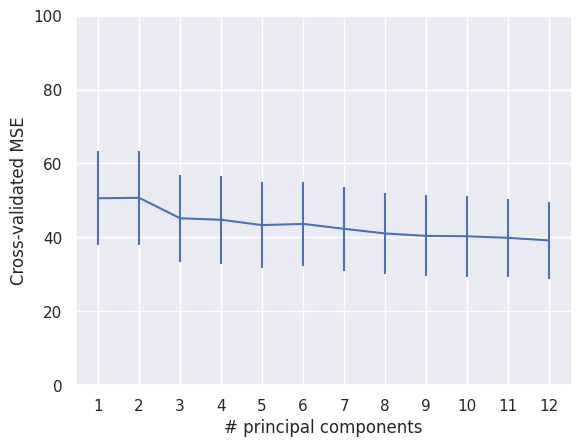

In [108]:
pcr_fig, ax = plt.subplots()
n_comp = param_grid['pca__n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE')
ax.set_xlabel('# principal components')
ax.set_xticks(n_comp)
ax.set_ylim([0, 100]);

In [109]:
pipe.named_steps['pca'].n_components = grid.best_params_['pca__n_components']
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
pcr_MSE = np.mean((pred - y_test)**2)
pcr_MSE

50.510476246307825

#### Best Subset Selection

With a slight modification to the function above.

In [110]:
from itertools import combinations

def best_subset_selection(X_train, X_test, y_train, y_test):
    
    p = X_train.shape[1]
    best_model_for_k = {}
    
    for k in range(p+1):
        
        # fit the null model
        if k == 0:
            X_null = X_train.copy()
            X_null.loc[:, :] = 0
            linreg = skl.LinearRegression().fit(X_null, y_train)
            train_MSE = np.mean((linreg.predict(X_train) - y_train)**2)

            pred = linreg.predict(X_test)
            test_MSE = np.mean((pred - y_test)**2)
            best_model_for_k[k] = ((), linreg, train_MSE, test_MSE)
            continue
        
        smallest_MSE = np.inf
        
        # fit all p choose k combinations and pick the model with the smallest test_MSE
        for subset in combinations(range(p), k):
            
            subset = list(subset)
            linreg = skl.LinearRegression().fit(X_train.iloc[:,subset], y_train)
            train_MSE = np.mean((linreg.predict(X_train.iloc[:,subset]) - y_train)**2)
            
            pred = linreg.predict(X_test.iloc[:,subset])
            test_MSE = np.mean((pred - y_test)**2)
            
            if test_MSE < smallest_MSE:
                best_model_for_k[k] = (subset, linreg, train_MSE, test_MSE)
            
    return best_model_for_k

In [111]:
best_model_for_k_boston = best_subset_selection(X_train, X_test, y_train, y_test)

In [112]:
model_sizes = list(best_model_for_k_boston.keys())
subsets = [value[0] for value in best_model_for_k_boston.values()]
models = [value[1] for value in best_model_for_k_boston.values()]
train_MSEs = [value[2] for value in best_model_for_k_boston.values()]
test_MSEs = [value[3] for value in best_model_for_k_boston.values()]

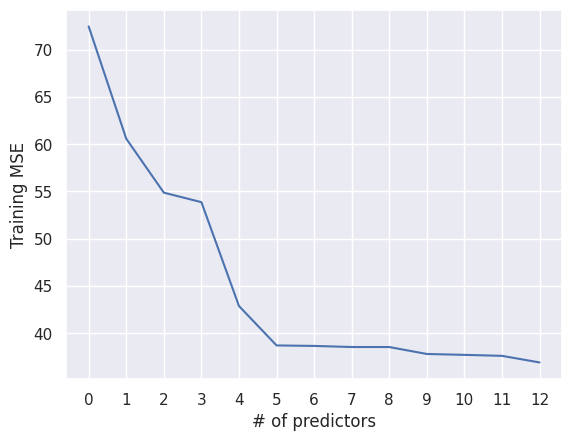

In [113]:
fig, ax = plt.subplots()
ax.plot(model_sizes, train_MSEs)
ax.set_xlabel('# of predictors')
ax.set_ylabel('Training MSE')
ax.set_xticks(model_sizes);


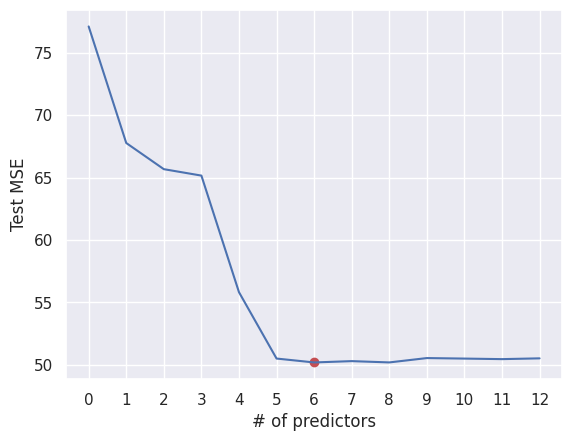

In [114]:
fig, ax = plt.subplots()
ax.plot(model_sizes, test_MSEs)
ax.set_xlabel('# of predictors')
ax.set_ylabel('Test MSE')
ax.set_xticks(model_sizes)
plt.scatter(model_sizes[np.argmin(test_MSEs)], np.min(test_MSEs), color='r');


In [115]:
best_model_for_k_boston[np.argmin(test_MSEs)]

([6, 7, 8, 9, 10, 11],
 LinearRegression(),
 38.65061733583978,
 50.182041497076604)

In [116]:
bss_MSE = best_model_for_k_boston[np.argmin(test_MSEs)][3]
bss_MSE

50.182041497076604

**(b)** 

In [117]:
approaches = ['OLS', 'Ridge', 'Lasso', 'PCR', 'Best-Subset']
mse_values = [ols_MSE, ridge_MSE, lasso_MSE, pcr_MSE, bss_MSE]

rmse_values = np.sqrt(mse_values)
for approach, rmse_value in zip(approaches, rmse_values):
    print(f"{approach}: {rmse_value:.2f}")

OLS: 7.11
Ridge: 7.10
Lasso: 7.07
PCR: 7.11
Best-Subset: 7.08


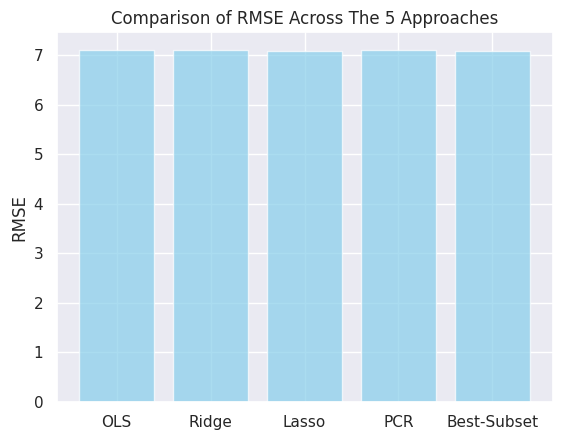

In [118]:
plt.bar(approaches, rmse_values, color="skyblue", alpha=0.7)
plt.ylabel("RMSE")
plt.title("Comparison of RMSE Across The 5 Approaches")
plt.show()

Looking at the RMSE of all 5 models we can see that the difference between them is pretty negligible. And while an RMSE of $7$ seems pretty big when looking at the mean of $3.6$, it's not unreasonable when you notice how skewed the data is (ranging from $0.00632$ to $88.9762$ with a mean of $3.6$ and a standard deviation of $8.6$). So our prediction, on average, is only off by about $0.8$ standard deviations.  

In [119]:
boston['crim'].mean(), boston['crim'].std(), boston['crim'].min(), boston['crim'].max() 

(3.613523557312254, 8.60154510533249, 0.00632, 88.9762)

If I were to pick from the models I'd probably pick the one with the least number predictors since the difference between their RMSEs is pretty negligible.

So that'd be the model containing six predictors chosen by **Best-Subset Selection**.

**(c)** It only involved six out of twelve predictors. Because it performed just as well as or even better than the models with many or all predictors, and it's usually better to reduce complexity whenever possible since that'd mean we can make reliable predictions with less data.